#                                                         Dataset Attributes for Reference

Data: Appliances energy prediction Data Set (https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)
Appliances : energy use in Wh

lights : energy use of light fixtures in the house in Wh

T1 : Temperature in kitchen area, in Celsius

RH_1 : Humidity in kitchen area, in %

T2 : Temperature in living room area, in Celsius

RH_2 : Humidity in living room area, in %

T3 : Temperature in laundry room area

RH_3 : Humidity in laundry room area, in %

T4 : Temperature in office room, in Celsius

RH_4 : Humidity in office room, in %

T5 : Temperature in bathroom, in Celsius

RH_5 : Humidity in bathroom, in %

T6 : Temperature outside the building (north side), in Celsius

RH_6 : Humidity outside the building (north side), in %

T7 : Temperature in ironing room , in Celsius

RH_7 : Humidity in ironing room, in %

T8 : Temperature in teenager room 2, in Celsius

RH_8 : Humidity in teenager room 2, in %

T9 : Temperature in parents room, in Celsius

RH_9 : Humidity in parents room, in %

To : Temperature outside (from Chievres weather station), in Celsius

Pressure : (from Chievres weather station), in mm Hg

RH_out : Humidity outside (from Chievres weather station), in %

Wind speed : (from Chievres weather station), in m/s

Visibility : (from Chievres weather station), in km

Tdewpoint : (from Chievres weather station), Â °C

rv1 : Random variable 1, nondimensional

rv2 : Random variable 2, nondimensional




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [2]:
raw_data = pd.read_csv('energydata_complete.csv')
data = raw_data.copy() #created a copy to keep the rew data intact and safe from errors
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
data.shape
#shape rows and columns

(19735, 29)

In [4]:
data.info()
#general overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [5]:
#removing the following columns: [“date”, “lights”] from dataset
data.drop(columns = ['date', 'lights'], inplace = True)
data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Exploratory Data Analysis

In [6]:
data.isnull().sum()
#number of NaN values and related feature

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
data.describe()
#summary statistics

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
#checking for duplicate data
data.duplicated().any()

False

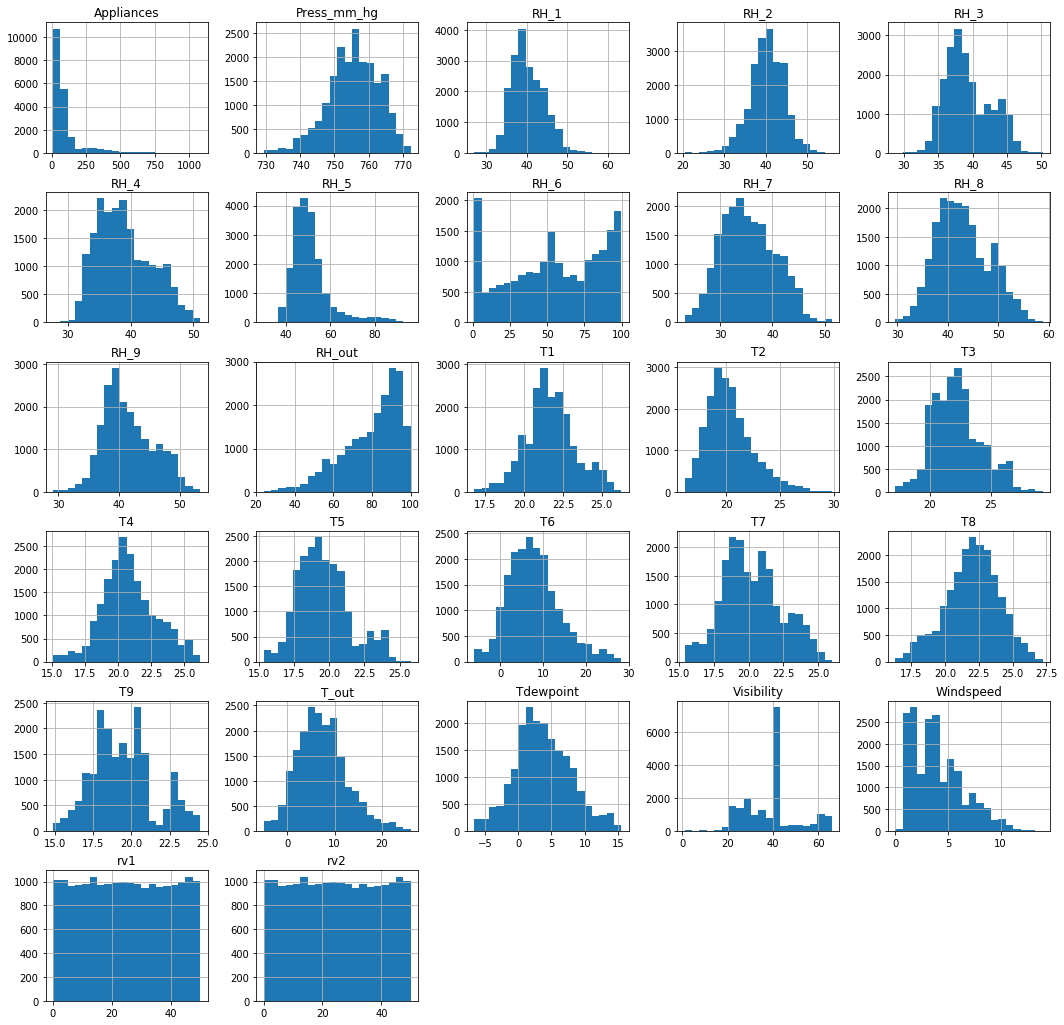

In [9]:
#visualizing the dataset
histogram = data.hist(figsize=(18, 18), bins = 20)

Some of the findings from these histograms are:

1.   Almost each temp plot follows Normal Distribution except the temp T9
2.   Almost every humdity plot follows Normal Distribution except RH_6 and RH_out
3. Most of the values in Appliances are in 200 Wh range, so appliances using high amount of energy are fewer in number.



# Data Normalization and Modelling

In [10]:
#first nromalize the dataset using min max scaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
features_data = normalized_data.drop(columns = ['Appliances'])
target_data = normalized_data['Appliances']

# Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [11]:
#defining new predictor and response variable
x = normalized_data[['T2']]
y = normalized_data['T6']

#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#model definition and fitting
simple_linear_reg_model = LinearRegression()
simple_linear_reg_model.fit(x_train, y_train)

#predictions
predicted_values = simple_linear_reg_model.predict(x_test)


In [12]:
# the R^2 value
print('R^2 value in two DP : ', round(r2_score(y_test, predicted_values), 2))

R^2 value in two DP :  0.64


# Question 13
What is the Mean Absolute Error (in two decimal places)?



In [13]:
# linear model with all predictors
X_train, X_test, Y_train, Y_test = train_test_split(features_data, target_data, test_size = 0.3, random_state = 42)

#model definition and fitting
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

#obtain predictions
yhat = linear_model.predict(X_test)


In [14]:
#mae upto 2 decimal places
print('Mean Absolute Error (in two decimal places) :', round(mean_absolute_error(Y_test, yhat), 2))

Mean Absolute Error (in two decimal places) : 0.05


# Question 14
What is the Residual Sum of Squares (in two decimal places)?



In [15]:
#rss upto 2 decimal places
print('Residual Sum of Squares (in two decimal places) :', round(np.sum(np.square(Y_test - yhat)), 2))

Residual Sum of Squares (in two decimal places) : 45.35


# Question 15
What is the Root Mean Squared Error (in three decimal places)?

In [16]:
#rmse upto 3 decimal places
print('Root Mean Squared Error (in three decimal places) :', round(np.sqrt(mean_squared_error(Y_test, yhat)), 3))


Root Mean Squared Error (in three decimal places) : 0.088


# Question 16
What is the Coefficient of Determination (in two decimal places)?

In [17]:
#r2score upto 2 decimal places
print('Coefficient of Determination (in two decimal places) :', round(r2_score(Y_test, yhat), 2))

Coefficient of Determination (in two decimal places) : 0.15


# Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [18]:
#weights for the linear model 
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')

In [19]:
#lowest and highest weight for linear model
linear_model_weights = linear_model_weights.sort_values(by = 'Linear_Model_Weight')
print('Lowest weight for:', linear_model_weights.iloc[0])
print('Highest weight for:', linear_model_weights.iloc[-1])

Lowest weight for: Features                   RH_2
Linear_Model_Weight   -0.456698
Name: 0, dtype: object
Highest weight for: Features                   RH_1
Linear_Model_Weight    0.553547
Name: 25, dtype: object


# Question 18
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [20]:
#ridge regression with alpha = 0.4
#model definition and fitting
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(X_train, Y_train)

#predictions
ridge_yhat = ridge_reg.predict(X_test)

In [21]:
#rmse on test set upto 3 decimal places
round(np.sqrt(mean_squared_error(Y_test, ridge_yhat)), 3)

0.088

# Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [22]:
#lasso regression with alpha = 0.001 and its feature weights
#model definition and fitting
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, Y_train)

#predictions
lasso_yhat = lasso_reg.predict(X_test)
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

In [23]:
#number of features having non-zero weights
len(lasso_weights_df[lasso_weights_df['Lasso_weight'] != 0])


4

# Question 20
What is the new RMSE with the Lasso Regression (in 3 decimal places)?  

In [24]:
#rmse on test set upto 3 decimal places
print('New RMSE with the Lasso Regression (in 3 decimal places) :', round(np.sqrt(mean_squared_error(Y_test, lasso_yhat)), 3))

New RMSE with the Lasso Regression (in 3 decimal places) : 0.094


# Summary

Q.12.) R^2 value in two DP :  0.64

Q.13.) Mean Absolute Error (in two decimal places) : 0.05

Q.14.) Residual Sum of Squares (in two decimal places) : 45.35

Q.15.) Root Mean Squared Error (in three decimal places) : 0.088

Q.16.) Coefficient of Determination (in two decimal places) : 0.15

Q.17.) Lowest weight for: RH_2, Highest weight for: RH_1

Q.18.) (RMSE) when evaluated on the test set does not change for ridge regression with alpha = 0.4

Q.19.) 4 features have non-zero feature weights

Q.20.) New RMSE with the Lasso Regression (in 3 decimal places) : 0.094